# Ham or Spam Detecting

In [1]:
# !pip install wordcloud

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot  as plt

In [4]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df[["v1", "v2"]]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ["class", "text"]
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
import seaborn as sns

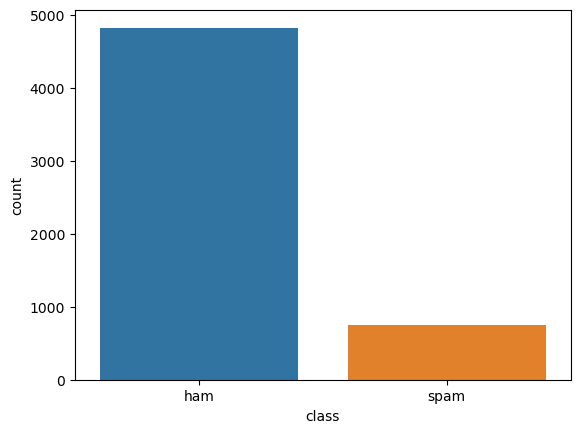

In [9]:
sns.countplot(x=df["class"]);

In [10]:
df["class"].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
d = {"ham":0, "spam":1}
df["class"] = df["class"].map(d)
df["class"].value_counts()

class
0    4825
1     747
Name: count, dtype: int64

Bir NLP projesine başlarken yapılması gerekenler
Her şeyi küçük harfe çevir

noktalama işaretlerini kaldır

rakamları kaldır

satır sonlarını kaldır

stopwords gereksiz kelimeleri kaldır

tokenize işlemi yap

Lemme ve stemma ile ekleri kaldır ve kökleri bul

vectorize et

In [12]:
def text_preprocessing():

    df["text"] = df["text"].str.lower() # convert to lower case
    df["text"] = df["text"].str.replace("[^\w\s]","",regex = True) # remove punctuations
    df["text"] = df["text"].str.replace("\n","",regex = True) # remove line breaks
    df["text"] = df["text"].str.replace("\d+", "", regex = True) # remove digits
    df["text"] = df["text"].str.replace("\r", "", regex = True) # multiline, remove "\r" from text

text_preprocessing()
df["text"][0],df["text"][1],df["text"][5]

('go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å to rcv')

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np


In [14]:
# DRY---do not repeat yourself

In [24]:
def wc(data, bgcolor):
    plt.figure(figsize=(10,10))
    mask = np.array(Image.open("360_F_320352822_Du18cSR0okuxVfYKgQIYYU794iqjQRAU.jpg"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask = mask)
    wc.generate("".join(data))
    plt.imshow(wc)
    plt.axis("off")
    
    

In [25]:
ham = df[df["class"]==0]["text"]
spam = df[df["class"]==1]["text"]

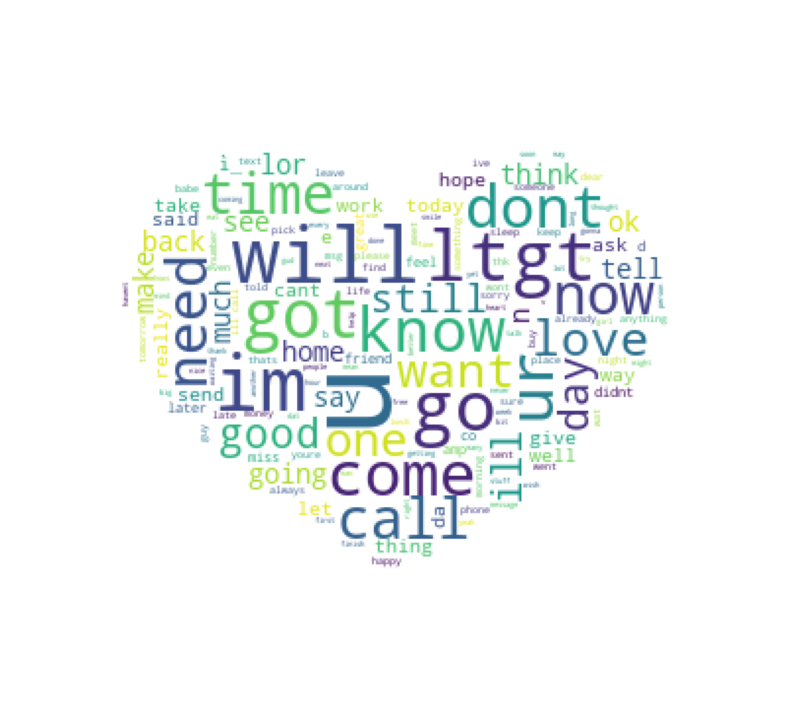

In [26]:
wc(ham,"white")

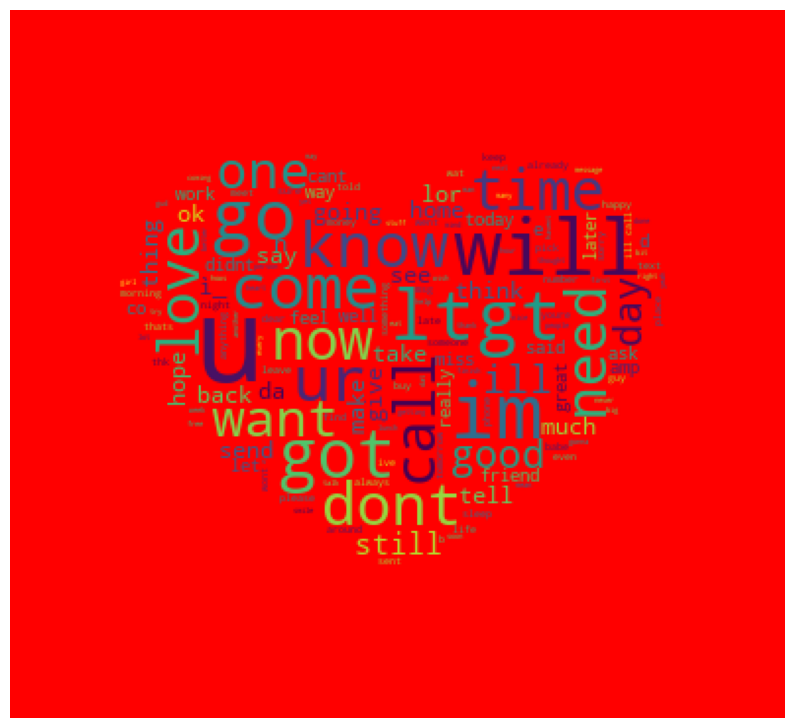

In [27]:
wc(ham,"red")

In [50]:
X = df["text"]
y= df["class"]

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
pr = PorterStemmer()
from textblob import TextBlob

In [53]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [54]:
vect = CountVectorizer(stop_words = "english", ngram_range = (1,2), analyzer = lemmafn)

In [55]:
X = vect.fit_transform(X)


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [57]:
nb = MultinomialNB()
model = nb.fit(x_train, y_train)

In [58]:
pred_nb = model.predict(x_test)
pred_nb

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [59]:
accuracy_score(pred_nb, y_test)

0.9766816143497757